In [ ]:
from google.colab import files
raw_data = files.upload()

Saving vgames2.csv to vgames2 (5).csv


 <img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# Section1 Project

---

#<center> **<데이터 기반 자회사 다음 분기 목표 타겟팅 게임 출시 기획안>** </center>

---
<br>

##- 프로젝트 순서 - 
<br>

1.  프로젝트 주제  
<br>

2. 게임 데이터 전처리 및 가공
<br>

3.  게임 시장 분석   
<br>
4.  결론 도출

<br>






##1 프로젝트 주제

- 데이터 기반으로 다음 분기 장르를 중심으로 타겟팅 게임 출시를 목표로 한다. 


<br>
<br>


In [ ]:
import io
import pandas as pd

## 2 게임 데이터 전처리 및 가공

데이터 소개 : 데이터는 '게임명', '가능 플랫폼', '연도', '게임 장르',  '제작업체', '각 지역별 게임 출고량'으로 구성되어 있다. 

(약 16,000개의 게임 데이터)

In [ ]:
raw_data = pd.read_csv(io.BytesIO(raw_data['vgames2.csv'])) # CSV 파일 데이터 프레임화 
raw_data.head(100)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
95,96,Robotron 64,N64,1998.0,Shooter,GT Interactive,0.07,0.02,0,0
96,97,Gummy Bears Magical Medallion,Wii,2011.0,Platform,Storm City Games,0.02,0,0,0
97,98,Tony Hawk's Pro Skater 2,N64,2001.0,Sports,Activision,0.59,0.16,0,0.01
98,99,Red Steel 2,Wii,2010.0,Shooter,Ubisoft,0.36,0.21,0.01,0.06


In [ ]:
# 데이터 전처리 과정 
raw_data2 = raw_data.drop('Unnamed: 0', axis=1) #unnamed 컬럼 drop

### 2-1 데이터 전처리 과정(결측치 처리)

In [ ]:
print(raw_data2.dtypes)
print(raw_data2.isnull().sum()) # 컬럼별 결측치 갯수 확인 

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


In [ ]:
raw_data2 = raw_data2.sort_values(by = ['Year'], ascending=False, na_position='first')
raw_data2.head(275)
raw_data2['Year'].unique() # 컬럼 내 고유값 확인

array([      nan, 2.020e+03, 2.017e+03, 2.016e+03, 2.015e+03, 2.014e+03,
       2.013e+03, 2.012e+03, 2.011e+03, 2.010e+03, 2.009e+03, 2.008e+03,
       2.007e+03, 2.006e+03, 2.005e+03, 2.004e+03, 2.003e+03, 2.002e+03,
       2.001e+03, 2.000e+03, 1.999e+03, 1.998e+03, 1.997e+03, 1.996e+03,
       1.995e+03, 1.994e+03, 1.993e+03, 1.992e+03, 1.991e+03, 1.990e+03,
       1.989e+03, 1.988e+03, 1.987e+03, 1.986e+03, 1.985e+03, 1.984e+03,
       1.983e+03, 1.982e+03, 1.981e+03, 1.980e+03, 9.800e+01, 9.700e+01,
       9.600e+01, 9.500e+01, 9.400e+01, 8.600e+01, 1.600e+01, 1.500e+01,
       1.400e+01, 1.300e+01, 1.200e+01, 1.100e+01, 1.000e+01, 9.000e+00,
       8.000e+00, 7.000e+00, 6.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
       2.000e+00, 1.000e+00, 0.000e+00])

In [ ]:
raw_data3 = raw_data2.dropna(axis=0) # 결측치 제거 
raw_data3.head(270)
print(raw_data3.isnull().sum())

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [ ]:
raw_data3 = raw_data3.astype({'Year' : int}) #컬럼값 전체 수치형으로 자료형 변환 
raw_data3.head(270)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
13028,XCOM 2,PS4,2016,Strategy,Take-Two Interactive,0.01,0.02,0,0.01
...,...,...,...,...,...,...,...,...,...
3120,Dead Island Definitive Collection,XOne,2016,Action,Deep Silver,0.02,0.02,0,0
1795,MLB 16: The Show,PS4,2016,Action,Sony Computer Entertainment,0.68,0,0,0.16
12139,Dead or Alive Xtreme 3: Venus,PSV,2016,Sports,Tecmo Koei,0,0,0.03,0
12682,Hitman (2016),XOne,2016,Action,Square Enix,0,0.01,0,0


### 2-2 데이터 전처리 과정(연도 순차 정렬)

In [ ]:
raw_data3 = raw_data3.sort_values(by = ['Year'], ascending=True)
raw_data4 = raw_data3.reset_index(inplace=False)

In [ ]:
raw_data4.drop('index', axis=1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0
1,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0,0.01
2,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0,0,0.2,0
3,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
4,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.6,0,0.2
...,...,...,...,...,...,...,...,...,...
16236,Doom (2016),PS4,2016,Shooter,Bethesda Softworks,0.49,0.66,0.02,0.22
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
16238,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
16239,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0


In [ ]:
def change_value(x): #날짜 자릿수 일치 함수
  if (0<x<20) : return (x + 2000)
  elif (79<x<100) : return (x + 1900)
  elif (1979<x<2000) : return x
  elif (2000<x<2021) : return x 
  else : return 2000

raw_data4['Year'] = raw_data4['Year'].apply(change_value) 

In [ ]:
raw_data5 = raw_data4.sort_values(by = ['Year'], ascending=True)
print(raw_data5.dtypes)
raw_data5.isnull().sum()

index           int64
Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object


index          0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
raw_data5 = raw_data5.reset_index(inplace=False)

In [ ]:
raw_data6 = raw_data5.drop(['level_0','index'], axis=1)

### 2-2 데이터 전처리 과정(정렬된 연도)

In [ ]:
raw_data6

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0,0.01
1,Asteroids,2600,1980,Shooter,Atari,4,0.26,0,0.05
2,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0,0
4,Defender,2600,1980,Misc,Atari,0.99,0.05,0,0.01
...,...,...,...,...,...,...,...,...,...
16236,Battleborn,XOne,2016,Shooter,Take-Two Interactive,0.08,0.04,0,0.01
16237,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
16238,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0


In [ ]:
raw_data7 = raw_data6

In [ ]:
def str_float(x): 
  x = pd.to_numeric(x, errors='ignore')
  return x

raw_data7['EU_Sales'] = raw_data7['EU_Sales'].apply(str_float)

In [ ]:
raw_data7['NA_Sales'] = raw_data7['NA_Sales'].apply(str_float)
raw_data7['EU_Sales'] = raw_data7['EU_Sales'].apply(str_float)
raw_data7['JP_Sales'] = raw_data7['JP_Sales'].apply(str_float)
raw_data7['Other_Sales'] = raw_data7['Other_Sales'].apply(str_float)

In [ ]:
raw_data7.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

###2-3 데이터 전처리 과정(각 지역별 게임 출고량 단위 일치)

In [ ]:
import numpy as np

raw_data7['NA_Sales'] = raw_data7['NA_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
raw_data7['EU_Sales'] = raw_data7['EU_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
raw_data7['JP_Sales'] = raw_data7['JP_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
raw_data7['Other_Sales'] = raw_data7['Other_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

In [ ]:
raw_data7['NA_Sales'] = raw_data7['NA_Sales']*10000 # (단위 : 출고량/만)
raw_data7['EU_Sales'] = raw_data7['EU_Sales']*10000
raw_data7['JP_Sales'] = raw_data7['JP_Sales']*10000
raw_data7['Other_Sales'] = raw_data7['Other_Sales']*10000

In [ ]:
raw_data7

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Kaboom!,2600,1980,Misc,Activision,10700.0,700.0,0.0,100.0
1,Asteroids,2600,1980,Shooter,Atari,40000.0,2600.0,0.0,500.0
2,Freeway,2600,1980,Action,Activision,3200.0,200.0,0.0,0.0
3,Bridge,2600,1980,Misc,Activision,2500.0,200.0,0.0,0.0
4,Defender,2600,1980,Misc,Atari,9900.0,500.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...
16236,Battleborn,XOne,2016,Shooter,Take-Two Interactive,800.0,400.0,0.0,100.0
16237,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,100.0,0.0
16238,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,300.0,0.0
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,100.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib as mpl

# 폰트 변환
# Windows
# mpl.rc("font", family='Malgun Gothic')

# MacOS
mpl.rc("font", family='AppleGothic')

# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings("ignore")
%matplotlib inline

# 두번째 방법
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [ ]:
print(raw_data7['Name'].unique())
print(raw_data7['Platform'].unique())
print(raw_data7['Publisher'].unique()) 
print(raw_data7['Genre'].unique()) # 컬럼 내 고유값 확인

['Kaboom!' 'Asteroids' 'Freeway' ... 'Brothers Conflict: Precious Baby'
 'Phantasy Star Online 2 Episode 4: Deluxe Package'
 'Imagine: Makeup Artist']
['2600' 'NES' 'DS' 'PC' 'GB' 'SNES' 'GEN' 'GG' 'SCD' 'NG' 'PS' 'SAT' '3DO'
 'TG16' 'N64' 'PCFX' 'DC' 'WS' 'PS2' 'GBA' 'XB' 'GC' 'PSP' 'X360' 'Wii'
 'PS3' '3DS' 'PSV' 'WiiU' 'PS4' 'XOne']
['Activision' 'Atari' 'Starpath Corp.' 'Coleco' 'Unknown' 'Tigervision'
 'Imagic' 'Mattel Interactive' 'Data Age' 'Mystique'
 '20th Century Fox Video Games' 'Taito' 'Parker Bros.' 'Men-A-Vision'
 'Wizard Video Games' 'Universal Gamex' 'Sega' 'Quelle'
 'Avalon Interactive' 'CPG Products' 'Bomb' 'Answer Software'
 'ITT Family Games' 'CBS Electronics' 'Nintendo' 'Hudson Soft'
 'Namco Bandai Games' 'Mycom' 'Capcom' 'Konami Digital Entertainment'
 'Enix Corporation' 'SquareSoft' 'Maxis' 'Palcom' 'HAL Laboratory'
 'Banpresto' 'Tecmo Koei' 'Square' 'Kemco' 'BPS' 'Imagineer'
 'Culture Brain' 'Human Entertainment' 'Epoch' 'Angel Studios'
 'Arena Entertainment' 'i

In [ ]:
df = raw_data7

In [ ]:
df.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Kaboom!,2600,1980,Misc,Activision,10700.0,7.000000e+02,0.0,100.0
1,Asteroids,2600,1980,Shooter,Atari,40000.0,2.600000e+03,0.0,500.0
2,Freeway,2600,1980,Action,Activision,3200.0,2.000000e+02,0.0,0.0
3,Bridge,2600,1980,Misc,Activision,2500.0,2.000000e+02,0.0,0.0
4,Defender,2600,1980,Misc,Atari,9900.0,5.000000e+02,0.0,100.0
5,Missile Command,2600,1980,Shooter,Atari,25600.0,1.700000e+03,0.0,300.0
6,Boxing,2600,1980,Fighting,Activision,7200.0,4.000000e+02,0.0,100.0
7,Checkers,2600,1980,Misc,Atari,2200.0,1.000000e+02,0.0,0.0
8,RealSports Volleyball,2600,1981,Sports,Atari,1200.0,1.000000e+02,0.0,0.0
9,Fireball,2600,1981,Action,Starpath Corp.,3000.0,2.000000e+02,0.0,0.0


In [ ]:
df_JP_mean = df.groupby('Genre')['JP_Sales'].agg(**{'mean_JP_Sales':'mean'}).reset_index() #장르별 출고량 평균값
df_NA_Genre = df.groupby('Genre')['NA_Sales'].agg(**{'mean_NA_Sales':'mean'}).reset_index()
df_EU_Genre = df.groupby('Genre')['EU_Sales'].agg(**{'mean_EU_Sales':'mean'}).reset_index()
df_Other_Genre = df.groupby('Genre')['Other_Sales'].agg(**{'mean_Other_Sales':'mean'}).reset_index()

## 3. 게임 시장 분석

### 3-1 지역별 게임 트렌드 분석(장르 중심으로)
<br>
- 'Shooting', 'Action', 'Sports' 등 12개의 장르 별 2020년 현재까지의 출고량 평균값 비교를 통해 각 지역에서 선호하는 게임 유형에 대해 분석한다. 

In [ ]:
df_JP_mean['mean_JP_Sales']

0     4.444923e+06
1     6.313233e+05
2     1.604893e+07
3     2.499130e+06
4     9.050742e+06
5     9.936396e+02
6     2.297424e+06
7     8.041182e+07
8     4.690478e+05
9     1.513076e+07
10    6.307670e+06
11    1.554631e+07
Name: mean_JP_Sales, dtype: float64

### 3-1-2 그래프 시각화(일본 - 북미 - 유럽 - 기타 지역)

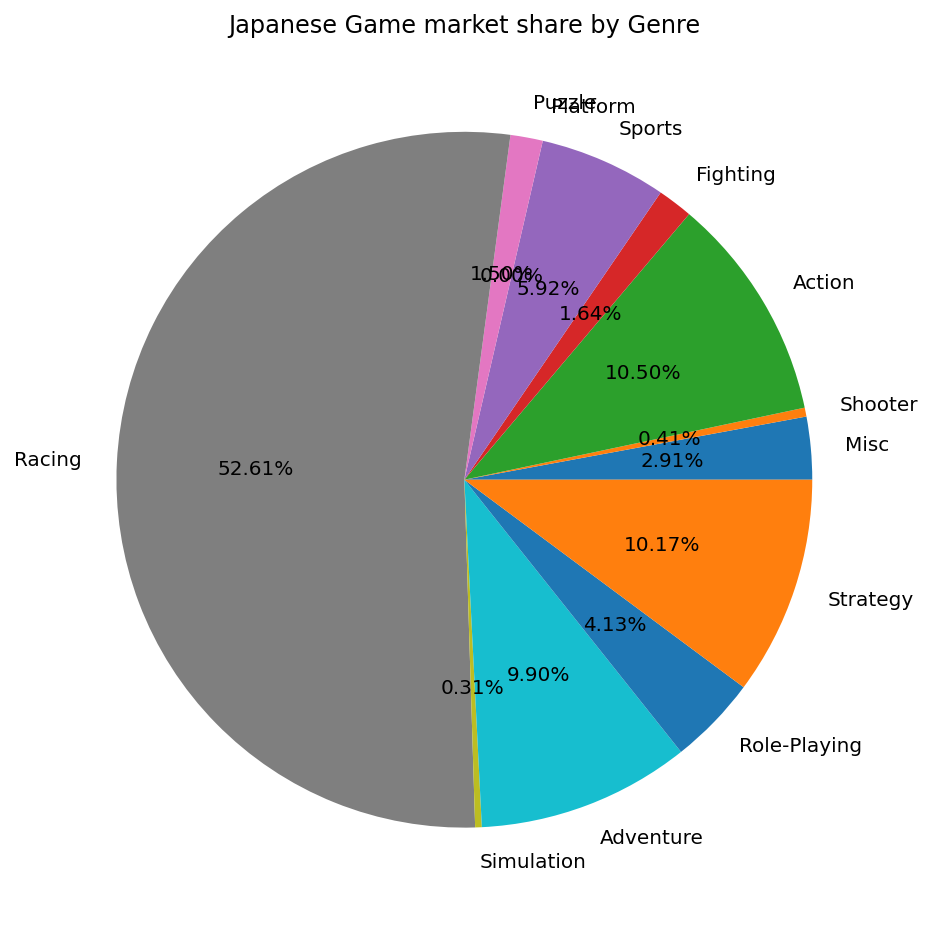

In [ ]:
labels = ['Misc', 'Shooter', 'Action', 'Fighting', 'Sports', 'Platform', 'Puzzle',
 'Racing', 'Simulation', 'Adventure', 'Role-Playing', 'Strategy']

pie_JP = [4.444923e+06, 6.313233e+05, 1.604893e+07, 2.499130e+06, 9.050742e+06, 
       9.936396e+02, 2.297424e+06, 8.041182e+07, 4.690478e+05, 1.513076e+07, 6.307670e+06, 1.554631e+07]


fig = plt.figure(figsize=(8,8)) #캔버스 생성
fig.set_facecolor('white') #캔버스 색
ax = fig.add_subplot() #프레임 생성

ax.pie(x=pie_JP, labels=labels, autopct='%.2f%%')
plt.title("Japanese Game market share by Genre")
plt.show()

그래프 분석 : 일본 게임 시장의 경우, '레이싱' 장르가 전체 선호도의 50%가 넘는 비율로 큰 선호도를 보이고 있으며 그 다음으로는 '액션'과 '전략&시뮬레이션' 장르의 선호가 있다는 것을 알 수 있다. 

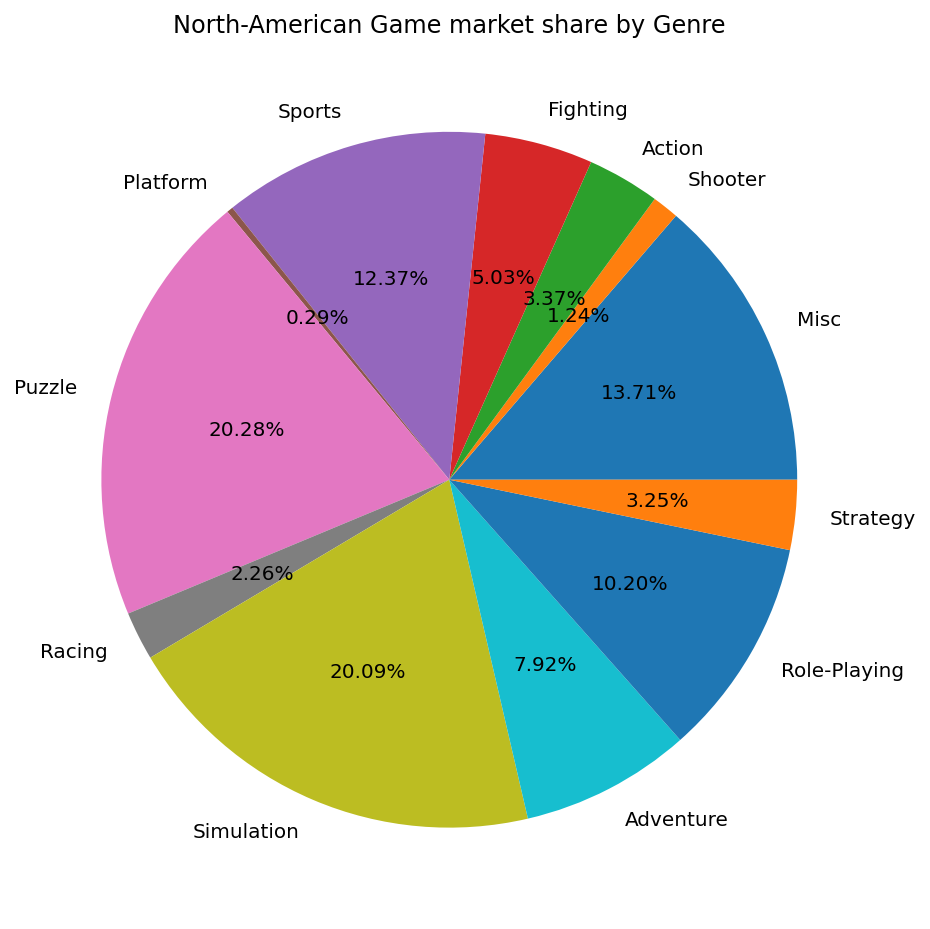

In [ ]:
labels = ['Misc', 'Shooter', 'Action', 'Fighting', 'Sports', 'Platform', 'Puzzle',
 'Racing', 'Simulation', 'Adventure', 'Role-Playing', 'Strategy']
pie_NA = [6.626802e+07, 5.994488e+06, 1.629005e+07, 2.433308e+07, 5.979886e+07, 1.415574e+06,
       9.803398e+07, 1.092367e+07, 9.711377e+07, 3.829998e+07, 4.932865e+07, 1.569607e+07]

fig = plt.figure(figsize=(8,8)) #캔버스 생성
fig.set_facecolor('white') #캔버스 색
ax = fig.add_subplot() #프레임 생성

ax.pie(x=pie_NA, labels=labels, autopct='%.2f%%')
plt.title("North-American Game market share by Genre")
plt.show()

그래프 분석 : 북미 시장의 경우, 일본 및 유럽 게임 시장에 비해 장르 선호 비율이 고르게 나타나고 있으며, '퍼즐'과 '시뮬레이션', '스포츠' 순서의 선호도를 보인다 . 

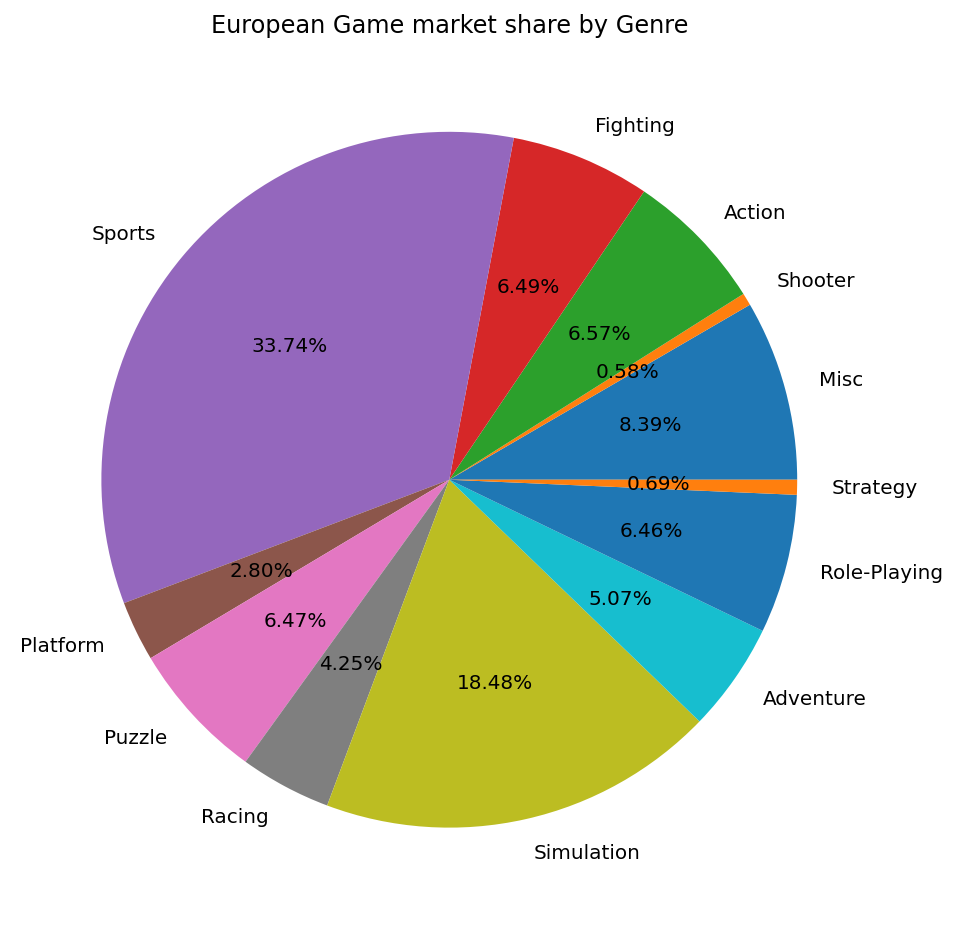

In [ ]:
pie_EU = [2.169909e+07, 1.498923e+06, 1.700717e+07, 1.677695e+07, 8.728743e+07, 7.244701e+06, 
          1.673694e+07, 1.099100e+07, 4.781488e+07, 1.312189e+07, 1.670451e+07, 1.794390e+06]

fig = plt.figure(figsize=(8,8)) #캔버스 생성
fig.set_facecolor('white') #캔버스 색
ax = fig.add_subplot() #프레임 생성

ax.pie(x=pie_EU, labels=labels, autopct='%.2f%%')
plt.title("European Game market share by Genre")
plt.show()

그래프 분석 : 유럽 게임 시장의 경우, '스포츠' 장르의 선호도가 전체 대비 33.74%로 가장 높으며 그 다음으로는 '시뮬레이션' 장르에 대한 선호도가 높은 편이다. 

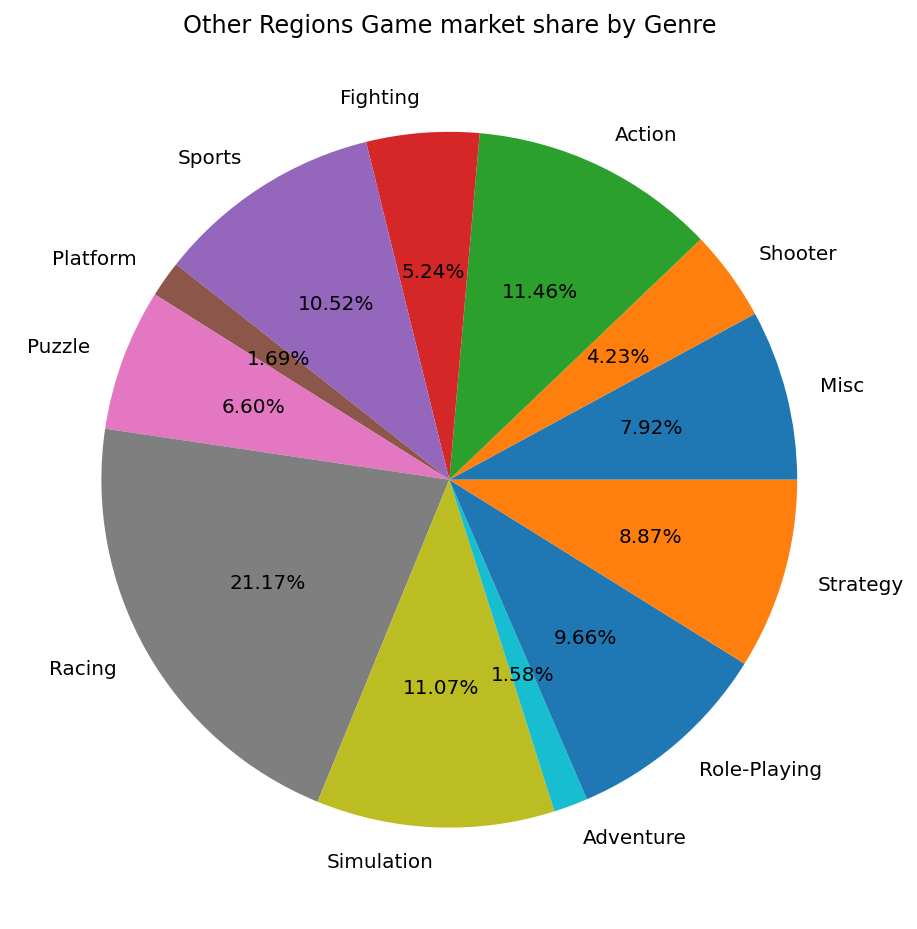

In [ ]:
pie_Other = [4.136366e+06, 2.208331e+06, 5.988451e+06, 2.736896e+06, 5.498866e+06, 8.836111e+05, 
             3.446071e+06, 1.105840e+07, 5.782040e+06, 8.277926e+05, 5.046243e+06, 4.633945e+06]

fig = plt.figure(figsize=(8,8)) #캔버스 생성
fig.set_facecolor('white') #캔버스 색
ax = fig.add_subplot() #프레임 생성

ax.pie(x=pie_Other, labels=labels, autopct='%.2f%%')
plt.title("Other Regions Game market share by Genre")
plt.show()

그래프 분석 : 기타 지역의 경우 '레이싱' 장르의 출시량이 21.17%로 높지만 장르 전체로 볼 때 고른 출시량을 나타낸 것을 볼 수 있다.

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Kaboom!,2600,1980,Misc,Activision,10700.0,700.0,0.0,100.0
1,Asteroids,2600,1980,Shooter,Atari,40000.0,2600.0,0.0,500.0
2,Freeway,2600,1980,Action,Activision,3200.0,200.0,0.0,0.0
3,Bridge,2600,1980,Misc,Activision,2500.0,200.0,0.0,0.0
4,Defender,2600,1980,Misc,Atari,9900.0,500.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...
16236,Battleborn,XOne,2016,Shooter,Take-Two Interactive,800.0,400.0,0.0,100.0
16237,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,100.0,0.0
16238,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,300.0,0.0
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,100.0,0.0


## 3-2 연도별 게임 시장 트렌드 분석(출고량 중심으로)
<br>
- 1980년대부터 2020년에 이르기까지 시장 총합 출고량을 바탕으로 각 연도별 선호도에 대한 분석을 하고자 한다. 

In [ ]:
# 연도별 게임 트렌드 
import pandas as pd
df1 = df.groupby(['Year','Genre'])[['NA_Sales','EU_Sales', 'JP_Sales',	'Other_Sales']].sum()

In [ ]:
df1.head()

NA_Sales      EU_Sales  JP_Sales  Other_Sales
Year Genre                                                  
1980 Action      3200.0  2.000000e+02       0.0          0.0
     Fighting    7200.0  4.000000e+02       0.0        100.0
     Misc       25300.0  1.500000e+03       0.0        200.0
     Shooter    65600.0  4.300000e+03       0.0        800.0
1981 Action    138600.0  1.100007e+09       0.0       1200.0

In [ ]:
df1['total'] = df1['EU_Sales'] + df1['JP_Sales'] + df1['NA_Sales'] + df1['Other_Sales']

In [ ]:
df1 = df1.drop(['EU_Sales','JP_Sales','NA_Sales','Other_Sales'], axis=1)

In [ ]:
df1

total
Year Genre                     
1980 Action        3.400000e+03
     Fighting      7.700000e+03
     Misc          2.700000e+04
     Shooter       7.070000e+04
1981 Action        1.100147e+09
...                         ...
2016 Sports        2.800144e+09
     Strategy      5.200000e+03
2017 Action        1.000000e+02
     Role-Playing  4.000000e+02
2020 Simulation    2.900000e+03

[388 rows x 1 columns]

In [ ]:
total2 = df1.rename_axis(['Year','Genre']).reset_index() #groupby 적용 후 인덱스 >> 컬럼화

###3-2-1 게임 시장 총합 출고량 합산

In [ ]:
total2.head(388) # 연도, 장르 기준 시장 총합 게임 출고량

,Year,Genre,total
0,1980,Action,3.400000e+03
1,1980,Fighting,7.700000e+03
2,1980,Misc,2.700000e+04
3,1980,Shooter,7.070000e+04
4,1981,Action,1.100147e+09
...,...,...,...
383,2016,Sports,2.800144e+09
384,2016,Strategy,5.200000e+03
385,2017,Action,1.000000e+02
386,2017,Role-Playing,4.000000e+02


### 3-2-2 그래프 시각화

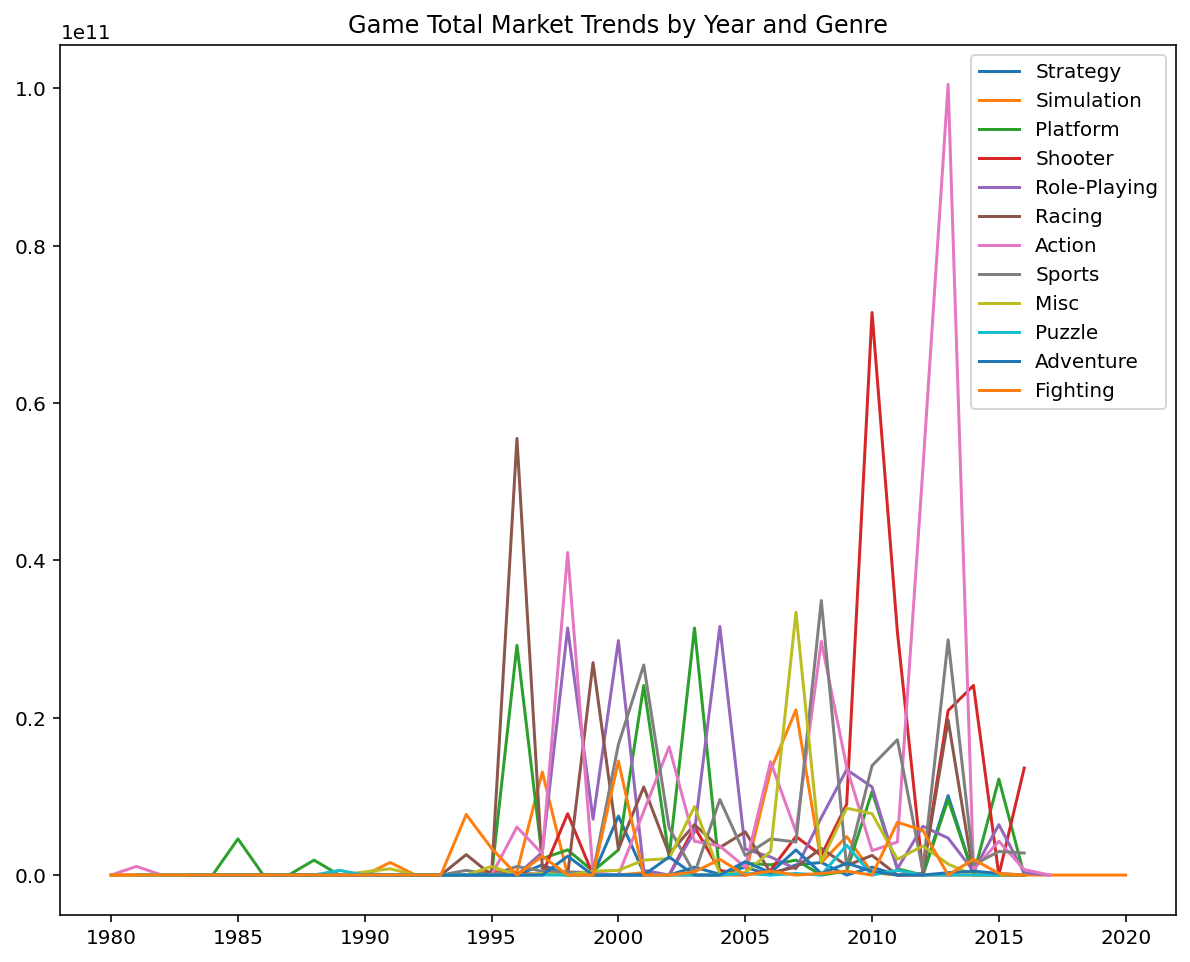

In [ ]:
Genre = ['Misc', 'Shooter', 'Action', 'Fighting', 'Sports', 'Platform', 'Puzzle',
         'Racing', 'Simulation', 'Adventure', 'Role-Playing', 'Strategy']
x = total2['Year']
y = total2['total']
genre_set = set(total2['Genre'])

plt.figure(figsize=(10,8))
for genre in genre_set:
    selected_data = total2.loc[total2['Genre'] == genre]
    plt.plot(selected_data['Year'], selected_data['total'], label = genre)
plt.title('Game Total Market Trends by Year and Genre')        
plt.legend()
plt.show()

그래프 분석 : 1990년대 중반 들어 글로벌 게임 시장에 대한 규모가 커지는 것을 알 수 있다. 또한 시기별로 1995년엔 'Racing'장르, 2000년에 접어드는 시기에는 'Role-Playing' 장르가 인기를 얻었으며 2010년 전후로, 'Shooter' 장르게임에 대한 시장 점유율이 급격하게 증가했으며 더 나아가, 'Action' 장르의 그래프 증가 기울기가 다른 모든 게임보다 앞서서 높게 올라가는 모습을 보여준다. 

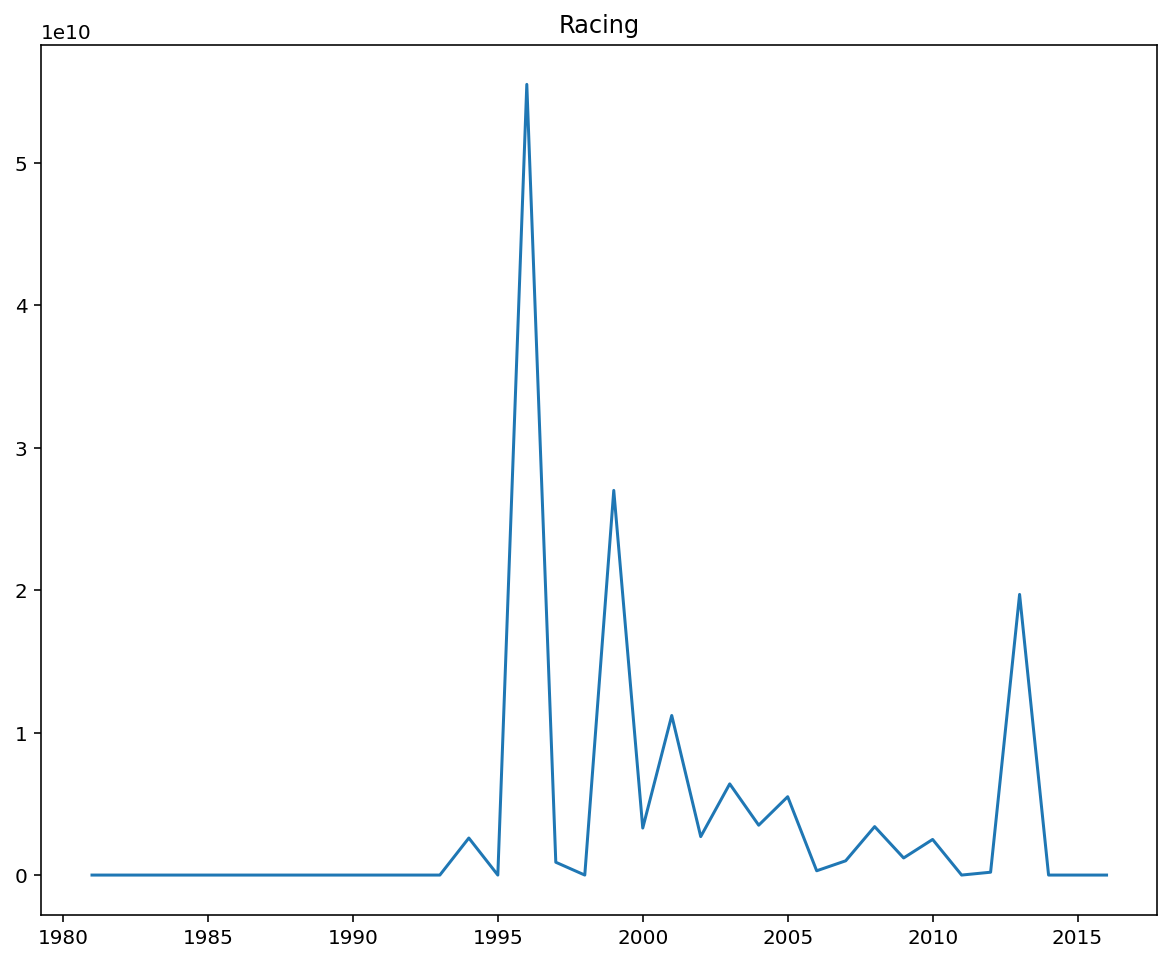

In [ ]:
plt.figure(figsize=(10,8))
selected_data = total2.loc[total2['Genre'] == 'Racing']
plt.plot(selected_data['Year'], selected_data['total'], label = genre)  
plt.title('Racing')
plt.show()

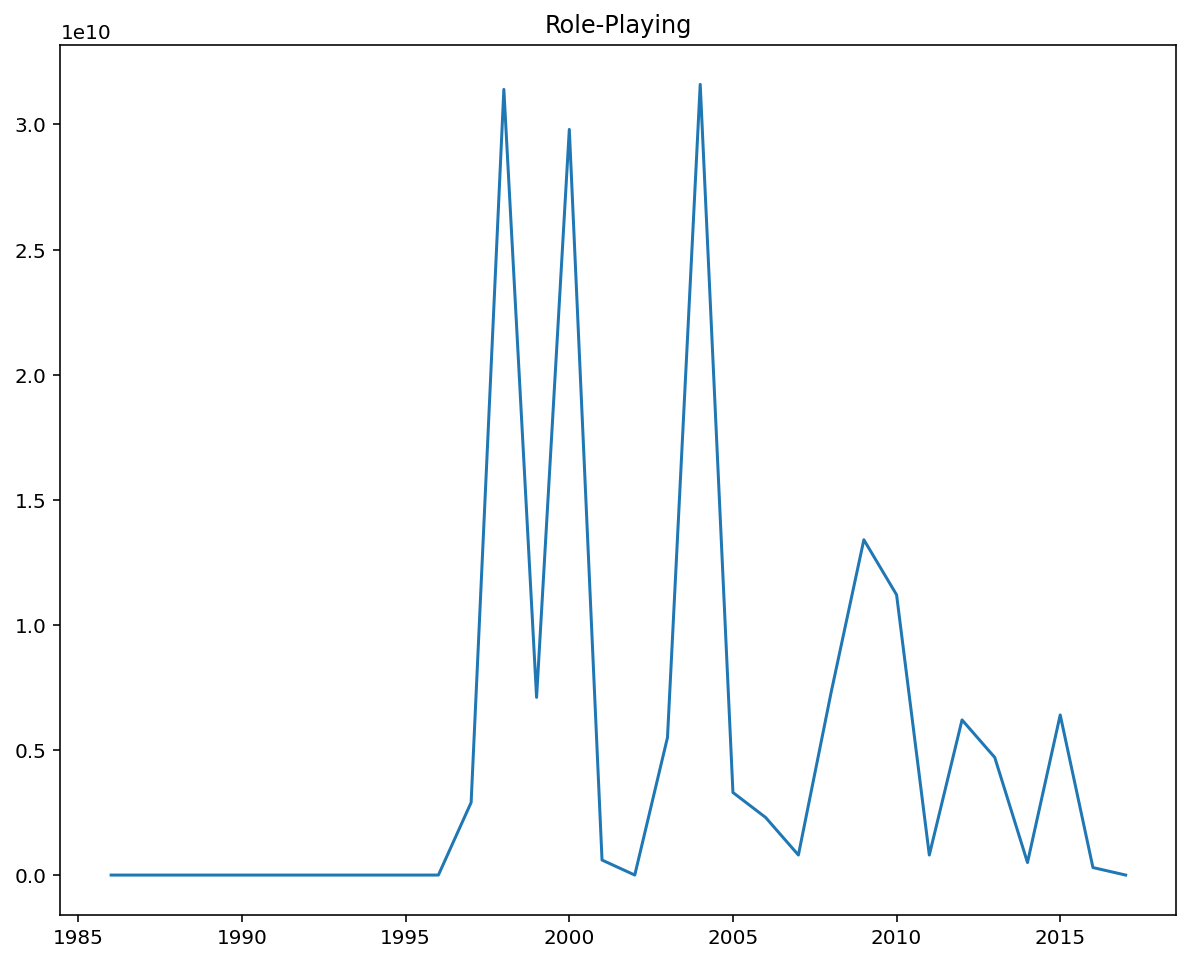

In [ ]:
plt.figure(figsize=(10,8))
selected_data = total2.loc[total2['Genre'] == 'Role-Playing']
plt.plot(selected_data['Year'], selected_data['total'], label = genre)  
plt.title('Role-Playing')
plt.show()

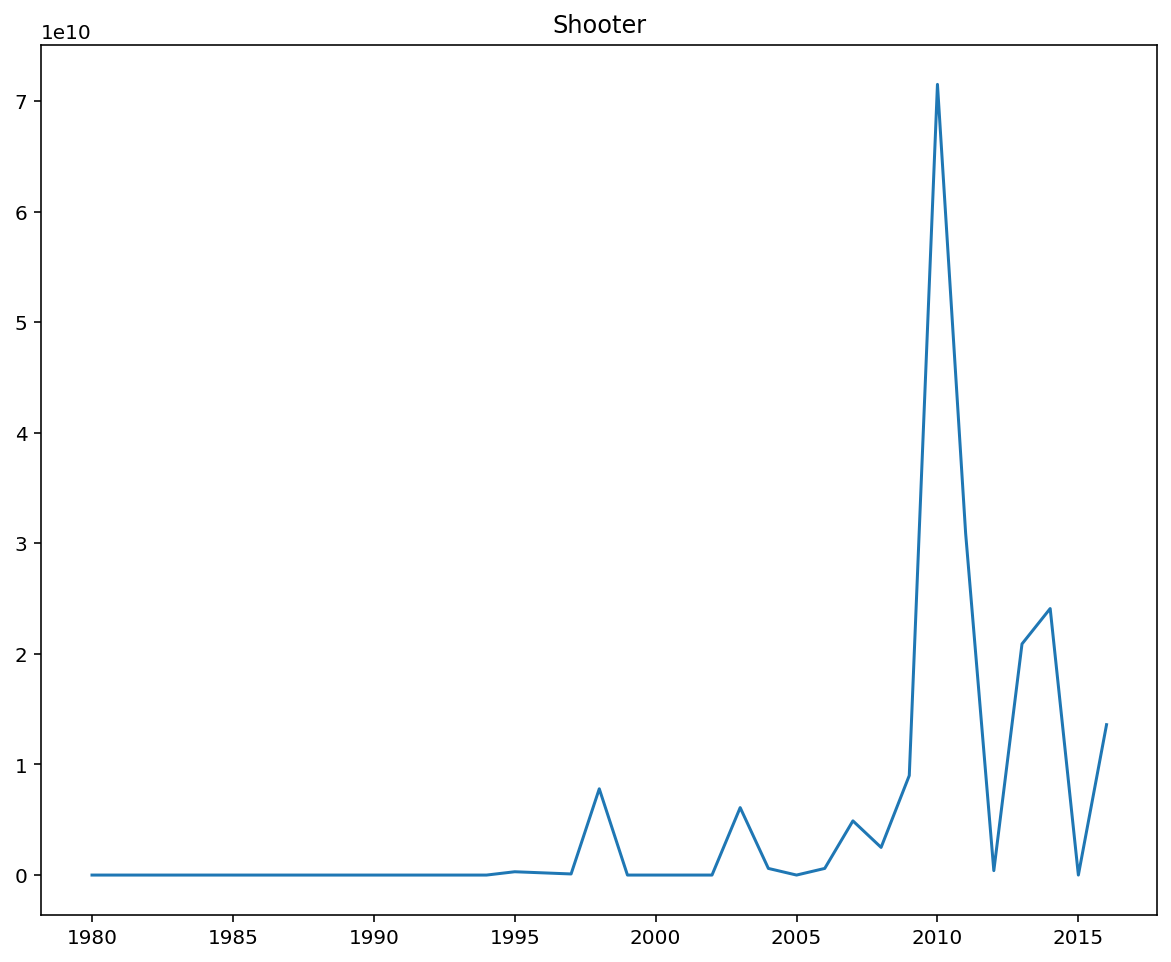

In [ ]:
plt.figure(figsize=(10,8))
selected_data = total2.loc[total2['Genre'] == 'Shooter']
plt.plot(selected_data['Year'], selected_data['total'], label = genre)  
plt.title('Shooter')
plt.show()

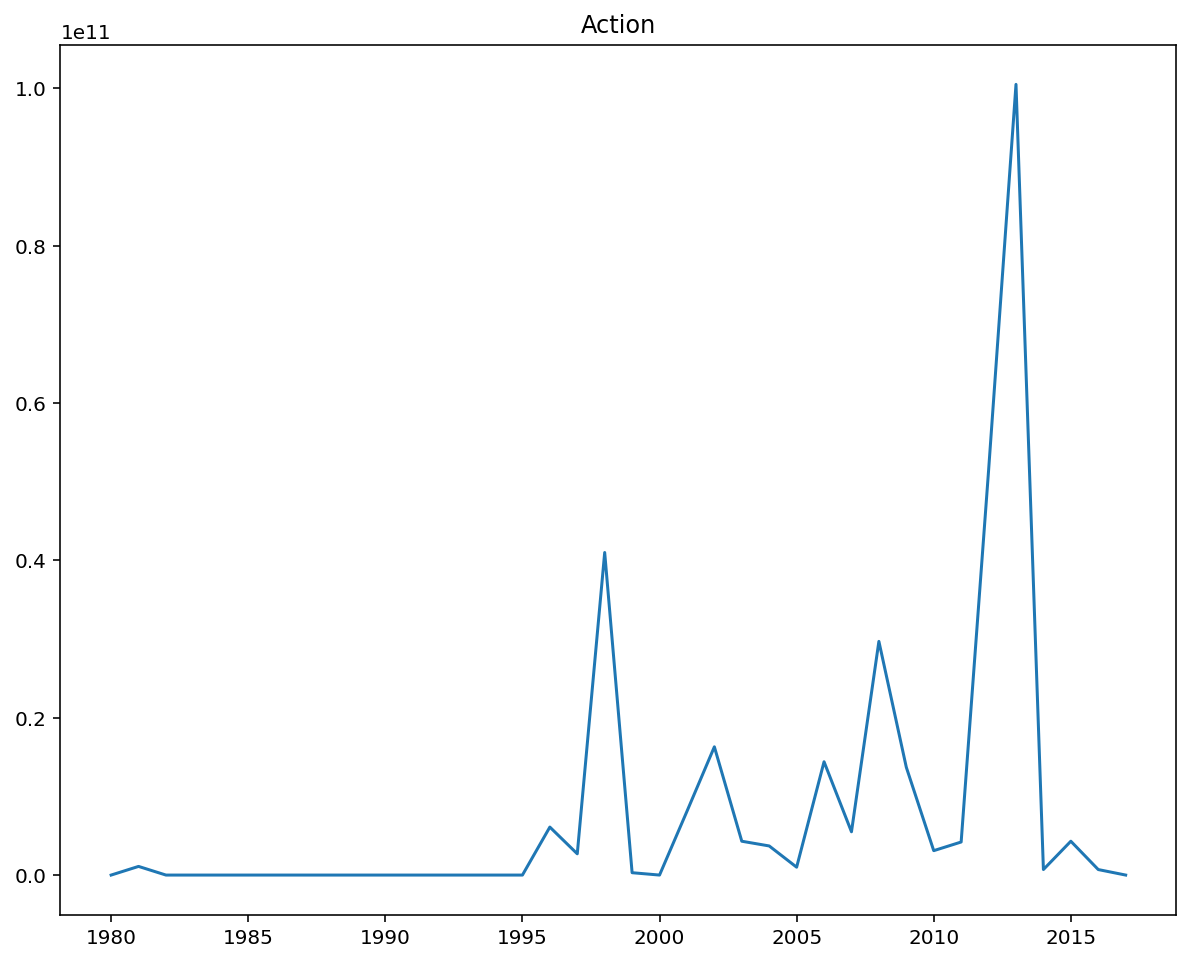

In [ ]:
plt.figure(figsize=(10,8))
selected_data = total2.loc[total2['Genre'] == 'Action']
plt.plot(selected_data['Year'], selected_data['total'], label = genre)  
plt.title('Action')
plt.show()

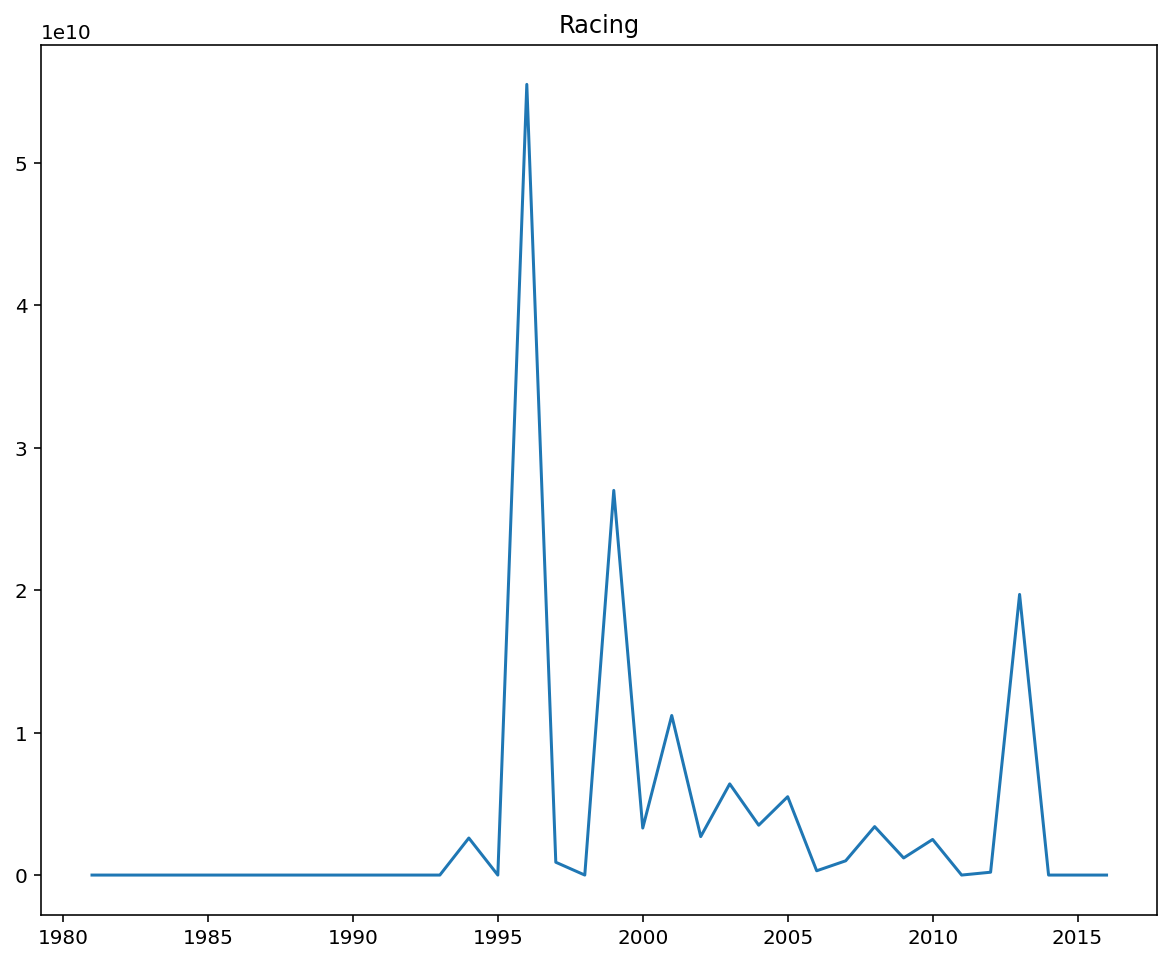

In [ ]:
plt.figure(figsize=(10,8))
selected_data = total2.loc[total2['Genre'] == 'Racing']
plt.plot(selected_data['Year'], selected_data['total'], label = genre)  
plt.title('Racing')
plt.show()

## 4 결론 도출 

###분석 결과 : 2010년대 중반 이후, 출시된 게임 출고량을 바탕으로 '액션' 장르에 대해 글로벌 게임 시장의 선호도가 급속도로 증가하고 있다는 추세를 볼 수 있었다. 이에 대해서 글로벌 트렌드를 근거로 하여, ***10% 정도의 액션 장르 선호도를 가지고 있는 일본 및 기타 지역*** 에 대한 액션 장르 게임 출시를 기획하고자 한다.  


<img src='https://imgur.com/Vy6PMkn.png' width = 800>